# core

> random geometric graph class

In [ ]:
#| hide
#| default_exp core

In [ ]:
#| hide
from nbdev.showdoc import *
import seaborn.objects as so

In [ ]:
#| export
import numpy as np
import functools
import collections
from fastcore.basics import patch

In [ ]:
#| export
class RGG:
    """random geometric graph"""
    def __init__(self,n:int,r:float, d:int=2):
        self.n = n
        self.r = r
        self.points = np.random.default_rng().random((n,d))
    
    @functools.cached_property
    def distance_matrix(self):
        a = self.points
        diff = a[:,None,:] - a[None,:,:]
        return np.linalg.norm(diff,axis=-1)

    @functools.cached_property
    def adj(self):
        mask = self.distance_matrix < self.r
        return {i: [j for j,v in enumerate(row) if v and j != i] for i,row in enumerate(mask)}
    


In [ ]:
rgg = RGG(100,0.1)
rgg.distance_matrix

array([[0.        , 0.885927  , 0.34636663, ..., 0.81227067, 0.14478971,
        0.79357696],
       [0.885927  , 0.        , 0.85463174, ..., 0.10870351, 0.79427493,
        0.87727521],
       [0.34636663, 0.85463174, 0.        , ..., 0.81933536, 0.43797592,
        0.45795139],
       ...,
       [0.81227067, 0.10870351, 0.81933536, ..., 0.        , 0.71053049,
        0.89923337],
       [0.14478971, 0.79427493, 0.43797592, ..., 0.71053049, 0.        ,
        0.85333577],
       [0.79357696, 0.87727521, 0.45795139, ..., 0.89923337, 0.85333577,
        0.        ]])

In [ ]:
rgg.adj

{0: [39, 54, 55],
 1: [9, 32, 38, 93],
 2: [15, 70],
 3: [6, 49, 84, 88, 96],
 4: [],
 5: [26],
 6: [3, 29, 84, 88, 96],
 7: [36],
 8: [23, 40, 87],
 9: [1, 24, 32, 38, 65, 73, 80, 93],
 10: [76],
 11: [42],
 12: [33, 72, 78],
 13: [31, 59, 77],
 14: [18, 20, 21, 37, 71],
 15: [2, 70],
 16: [44, 98],
 17: [],
 18: [14, 20, 29, 37, 71, 92],
 19: [57],
 20: [14, 18, 37, 71],
 21: [14],
 22: [28, 41, 45, 46],
 23: [8, 40, 41, 51, 87],
 24: [9, 65, 73, 80, 93],
 25: [],
 26: [5],
 27: [30, 35, 47, 75, 90],
 28: [22, 46],
 29: [6, 18, 35, 84, 90, 92, 96],
 30: [27, 35, 47, 75, 86, 90],
 31: [13, 45, 59, 94],
 32: [1, 9, 38, 93, 97],
 33: [12, 72, 78],
 34: [60, 61, 67],
 35: [27, 29, 30, 47, 75, 84, 90, 92],
 36: [7, 56],
 37: [14, 18, 20, 71],
 38: [1, 9, 32, 73, 80, 93],
 39: [0, 54, 55],
 40: [8, 23, 87],
 41: [22, 23, 51],
 42: [11],
 43: [],
 44: [16, 98],
 45: [22, 31, 94],
 46: [22, 28],
 47: [27, 30, 35, 75, 90],
 48: [83],
 49: [3],
 50: [52],
 51: [23, 41],
 52: [50, 54],
 53: [],

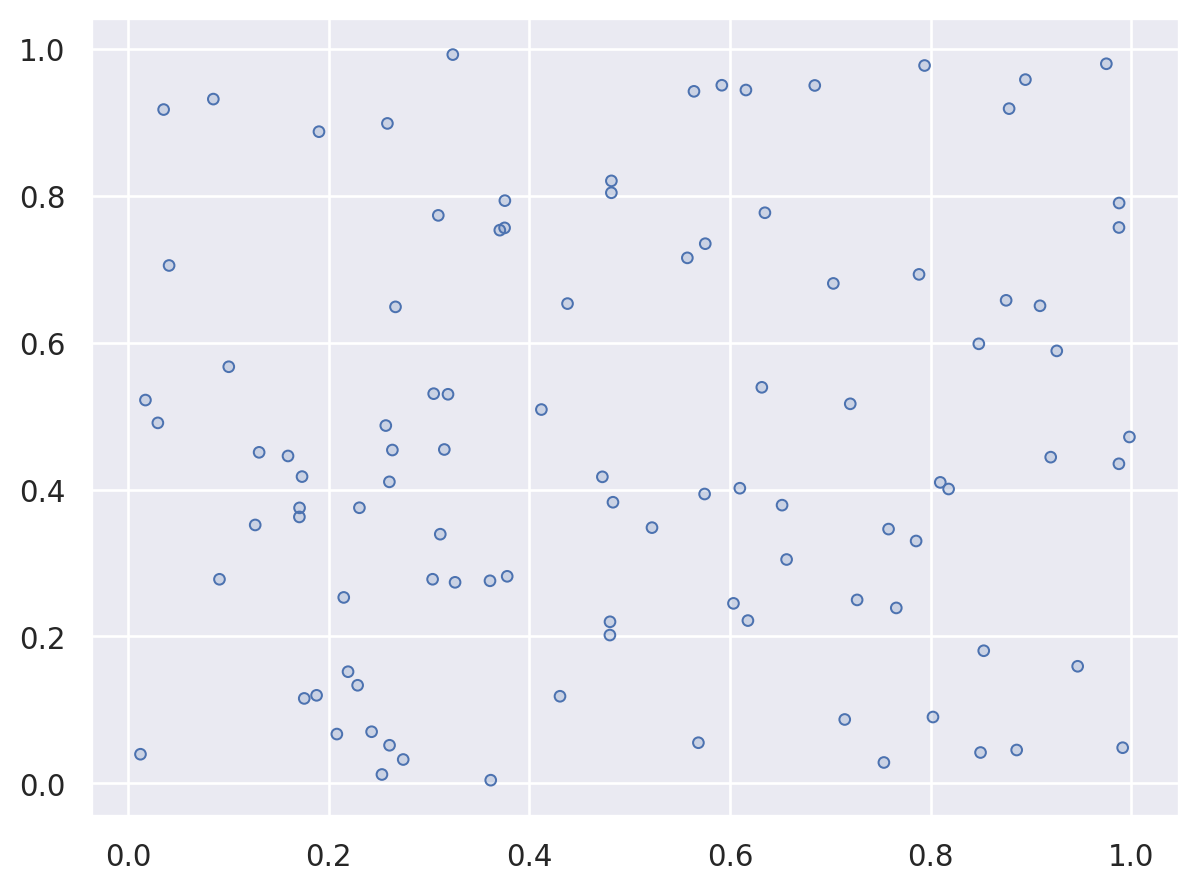

In [ ]:

p = so.Plot(x=rgg.points[:,0], y=rgg.points[:,1])
p.add(so.Dots())

In [ ]:
#| export
@patch
def n_comp(self:RGG):
    def dfs(gr,s):
        for v in gr[s]:
            if v not in self.parent:
                self.parent[v]=s
                dfs(gr,v)
                self.topo.append(v)
    self.parent = {}
    self.topo=[]
    count = 0
    for i in range(self.n):
        if i not in self.parent:
            count+=1
            self.parent[i]=None
            dfs(self.adj,i)
            self.topo.append(i)
    return count


In [ ]:
rgg.n_comp()

26

In [ ]:
#| export
@patch
def degree_distribution(self: RGG):
    dgr=collections.Counter([len(v) for _,v in self.adj.items()])
    return np.array(list(dgr.items()))

In [ ]:
d_np = rgg.degree_distribution()
d_np

array([[ 3, 18],
       [ 4,  9],
       [ 2, 19],
       [ 5, 10],
       [ 0,  8],
       [ 1, 23],
       [ 8,  3],
       [ 6,  7],
       [ 7,  3]])

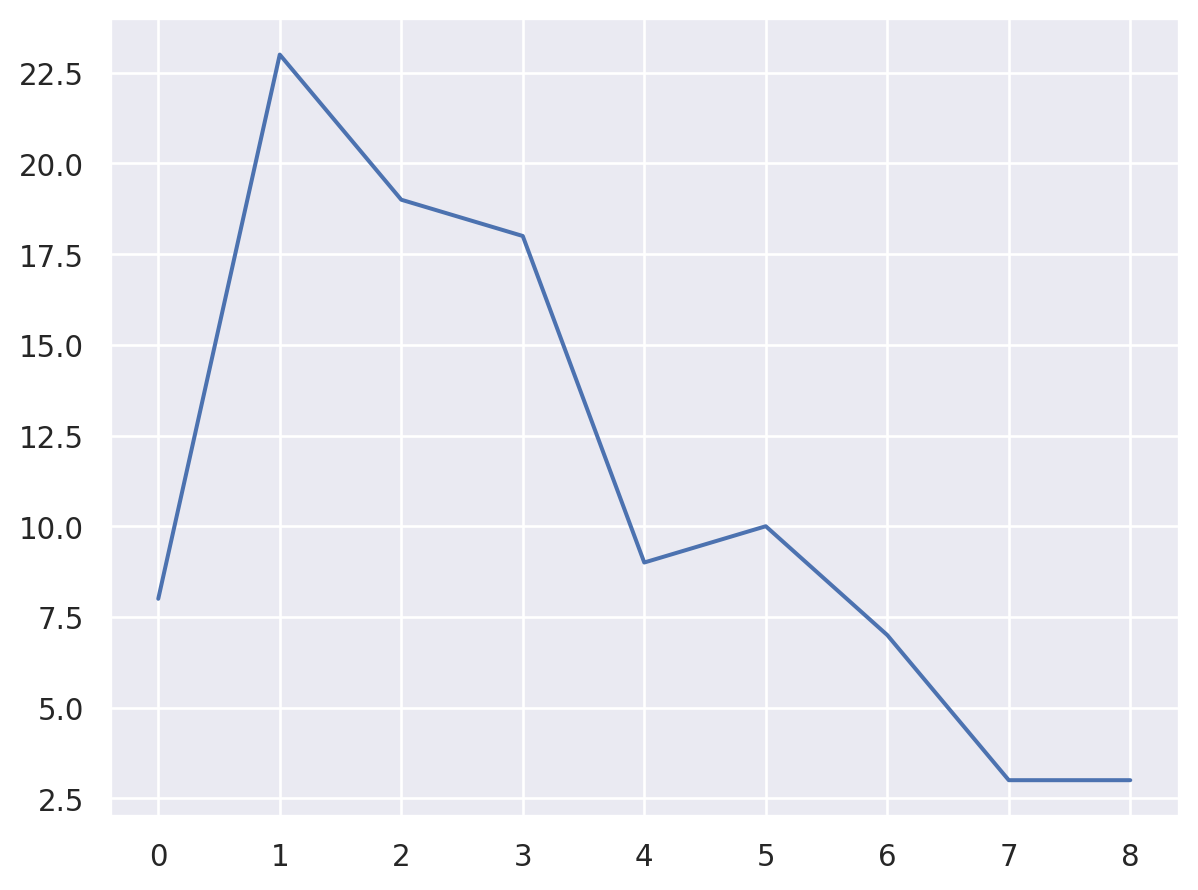

In [ ]:
(
    so.Plot(x=d_np[:,0], y=d_np[:,1])
    .add(so.Line())
)

In [ ]:
#| export
@patch
def cyclic(self:RGG):
    for k, lst in self.adj.items():
        for v in lst:
            if k != self.parent[v] and v!=self.parent[k]: 
                return True
    return False

In [ ]:
rgg.cyclic()

True

In [ ]:
#| export
@patch
def n_tri(self:RGG):
    A = (self.distance_matrix<=self.r).astype(np.int64)
    np.fill_diagonal(A,0)
    return np.trace(np.linalg.matrix_power(A,3))//6

In [ ]:
rgg.n_tri()

112

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()